In [87]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import seaborn as sns
import pandas as pd
import awkward as ak
from glob import glob

In [2]:
from analysis.convert import root_to_numpy

In [90]:
paths_durham = glob("/nfs/dust/ilc/user/bliewert/fullflow_v3/zhh/root/*_MisclusteringSigDurham.root")
paths_gnn = glob("/nfs/dust/ilc/user/bliewert/fullflow_v3/zhh/root/*_MisclusteringSigGNN.root")

In [98]:
raw = {
    'gnn': paths_gnn,
    'reco': paths_durham
}
results = {
    'gnn_x': [],
    'gnn_y': [],
    'gnn_group': [],
    'reco_x': [],
    'reco_y': [],
    'reco_group': []
}

for key in raw:
    x_all = []
    y_all = []
    
    for path in raw[key]:
        with ur.open(path) as file:
            if len(file.keys()) > 0:
                data = file['eventTree']
                
                x = ak.flatten(data['energyfrac_true_ICNs'].array(), axis=None).to_list()
                y = ak.flatten(data['energyfrac_reco_ICNs'].array(), axis=None).to_list()
                
                x_all = x_all + x
                y_all = y_all + y
            
    results[f'{key}_x'] = x_all
    results[f'{key}_y'] = y_all

In [100]:
df = pd.DataFrame(results)

Text(0.5, 1.0, 'Durham (LCFIPlus)')

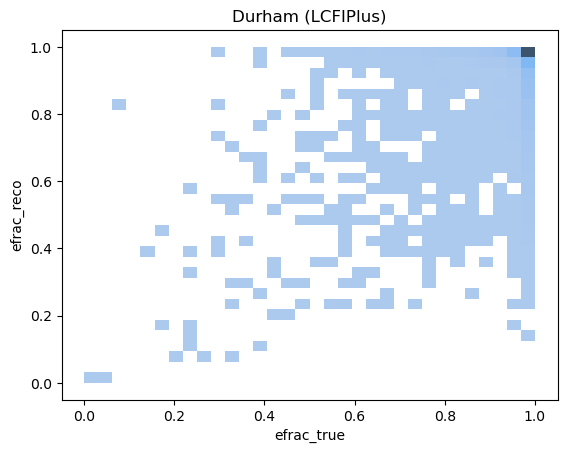

In [104]:
ax = sns.histplot(df, x='reco_x', y='reco_y', bins=(32, 32))
ax.set_xlabel('efrac_true')
ax.set_ylabel('efrac_reco')
ax.set_title('Durham (LCFIPlus)')

Text(0.5, 1.0, 'GNN+SC')

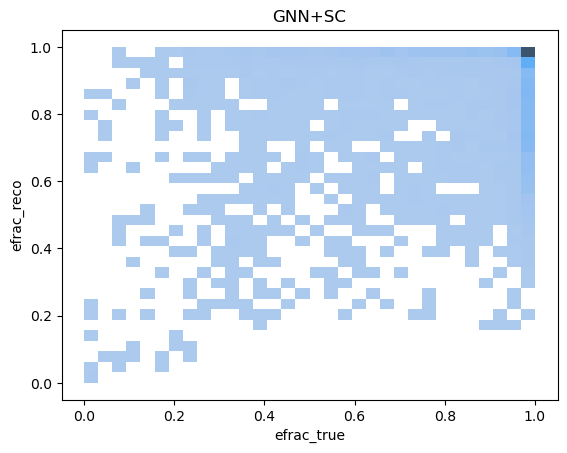

In [105]:
ax = sns.histplot(df, x='gnn_x', y='gnn_y', bins=(32, 32))
ax.set_xlabel('efrac_true')
ax.set_ylabel('efrac_reco')
ax.set_title('GNN+SC')